This code below combined all reading_device files by their device number

In [17]:
# import os
# import pandas as pd

# # Set the directory path where the CSV files are stored
# directory = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/readings_device_original'

# # List all the CSV files in the directory
# csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# # Create an empty dictionary to store the combined dataframes
# combined_dict = {}

# # Iterate over each CSV file and append it to the corresponding dataframe in the dictionary
# for file in csv_files:
#     file_path = os.path.join(directory, file)
#     device_number = file.split('.')[1].split('_')[0]  # Get the device number from the file name
# #     print(device_number)
#     df = pd.read_csv(file_path)
#     if device_number in combined_dict:
#         combined_dict[device_number] = pd.concat([combined_dict[device_number], df], ignore_index=True)
#     else:
#         combined_dict[device_number] = df

# # Write the combined data to new CSV files, one for each device number
# for device_number, df in combined_dict.items():
#     filename = f'combined_{device_number}.csv'
#     df.to_csv(filename, index=False)


The Code below sort the combined files based on the date.

In [18]:
# import pandas as pd
# import glob

# # find all CSV files with the name pattern 'combined_*.csv'
# csv_files = glob.glob('/Users/zeqi/Desktop/cs506.nosync/Project/Data/combined_reading_device/combined_*.csv')

# for file in csv_files:
#     # read in CSV file
#     df = pd.read_csv(file)
    
#     # sort by 'readingDtUtz' column in ascending order
#     df_sorted = df.sort_values('readingDtUtz')
    
#     # write out sorted data to new CSV file
#     sorted_filename = file.split('.csv')[0] + '_sorted_by_date.csv'
#     df_sorted.to_csv(sorted_filename, index=False)


Creating a scatter plot for each device based on the temperature and psi values. And combine them together.

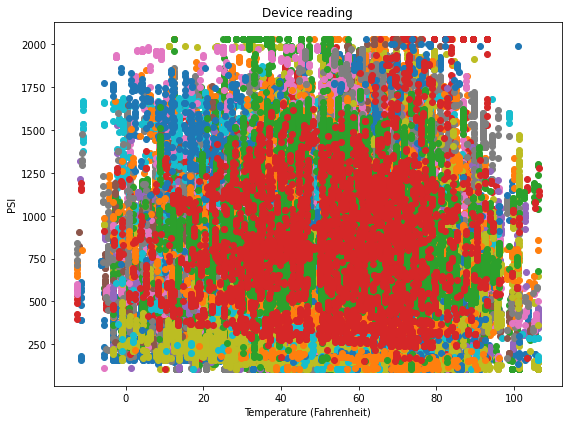

In [34]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# from IPython.display import IFrame
from matplotlib.backends.backend_pdf import PdfPages


path = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/combined_reading_device/'

# find all CSV files with the name pattern 'combined_*_sorted_by_date.csv'
csv_files = glob.glob(path+'combined_*_sorted_by_date.csv')

# create PDF file to save figures
with PdfPages('scatter_plots.pdf') as pdf:
    plt.figure(figsize=(8, 6))  # create new figure

    for i, file in enumerate(csv_files):
        # read in CSV file
        df = pd.read_csv(file)

        # drop any rows with null or empty values
        df_clean = df.dropna()

        # create scatter plot of temperature (in Fahrenheit) versus psi values
#         plt.subplot(2, 3, i+1)  # create subplot
        plt.scatter(df_clean['fahrenheit'], df_clean['valuePsi'])
        plt.xlabel('Temperature (Fahrenheit)')
        plt.ylabel('PSI')
        plt.title(f'Device {file.split("_")[1]}')


    plt.tight_layout()  # adjust subplot spacing
    pdf.savefig()  # save figure to PDF file

plt.show()
plt.close()  # close figure
# IFrame('scatter_plots.pdf', width=600, height=400)



Analysis: As you can see, it's not very clear to show the relationship between temperature and psi values.

Now we try to make kmeans clustering for the data based on fahrenheit

/Users/zeqi/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


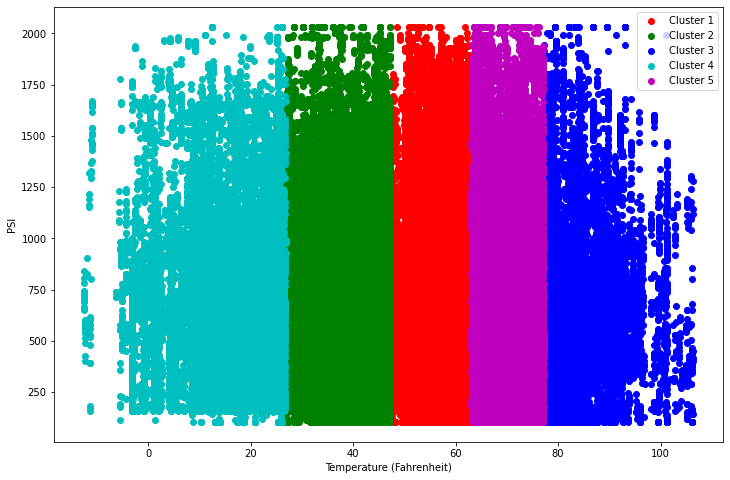

In [63]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

path = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/combined_reading_device/'

# find all CSV files with the name pattern 'combined_*_sorted_by_date.csv'
csv_files = glob.glob(path+'combined_*_sorted_by_date.csv')

# combine all CSV files into a single DataFrame
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    df['device'] = file.split('_')[1]
    dfs.append(df)

combined_df = pd.concat(dfs)

# drop any rows with null or empty values
combined_df_clean = combined_df.dropna()

# perform K-means clustering based on temperature and psi values
# X = combined_df_clean[['fahrenheit', 'valuePsi']]
X = combined_df_clean[['fahrenheit']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# add a new column to the DataFrame to indicate cluster assignment
combined_df_clean['cluster'] = kmeans.labels_

# save the combined DataFrame to a new CSV file
combined_df_clean.to_csv('combined_all_device.csv', index=False)

# plot scatter plot in different colors based on cluster assignment
colors = ['r', 'g', 'b', 'c', 'm']
# colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

plt.figure(figsize=(12, 8))
for i in range(5):
    cluster_df = combined_df_clean[combined_df_clean['cluster'] == i]
    color = colors[i]
    plt.scatter(cluster_df['fahrenheit'], cluster_df['valuePsi'], c=color, label=f'Cluster {i+1}')

plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('PSI')
plt.legend()
plt.show()


In [47]:
correlation = combined_df_clean['valuePsi'].corr(combined_df_clean['fahrenheit'])
print(f"The correlation between psi value and temperature is: {correlation}")


The correlation between psi value and temperature is: -0.05108003761451929


The correlation coefficient ranges from -1 to 1, with values closer to 1 indicating a strong positive correlation between two variables, values closer to -1 indicating a strong negative correlation, and values close to 0 indicating no correlation. Since the correlation coefficient is close to 0, there is no clear relationship between psi value and temperature.

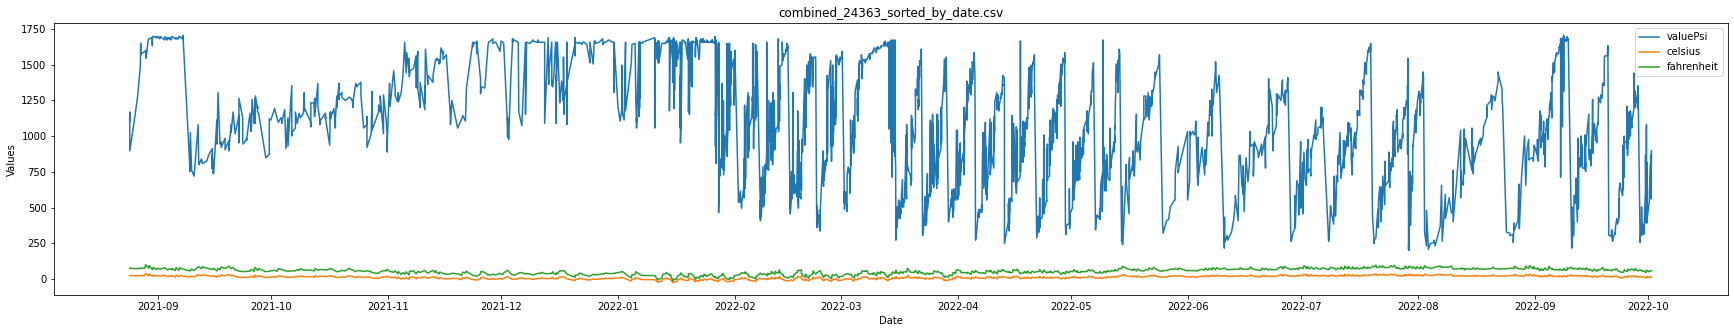

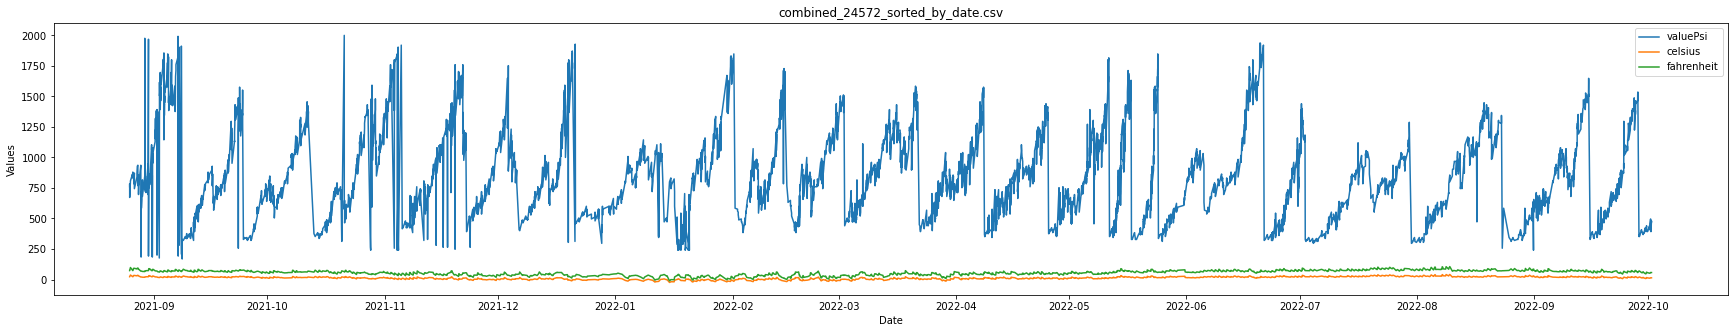

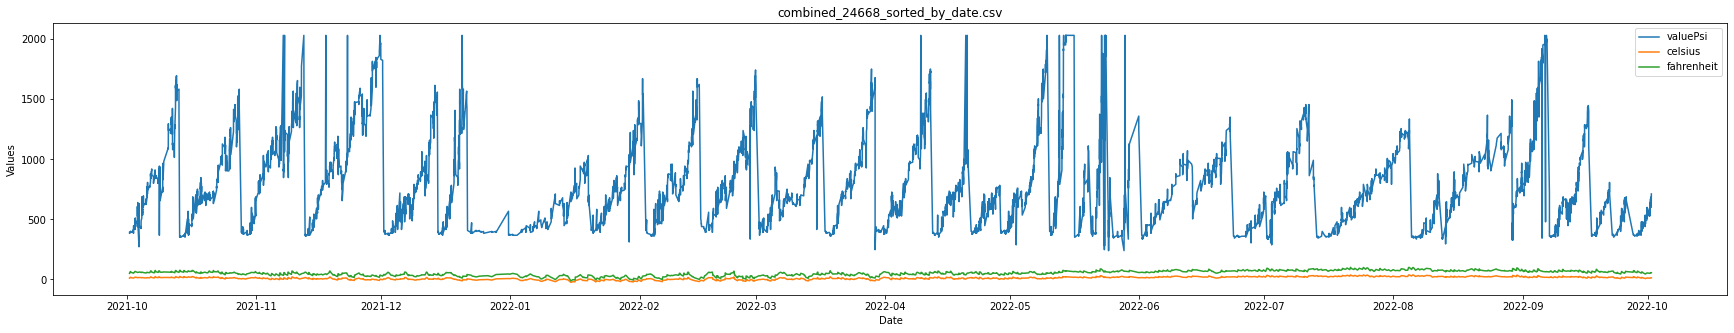

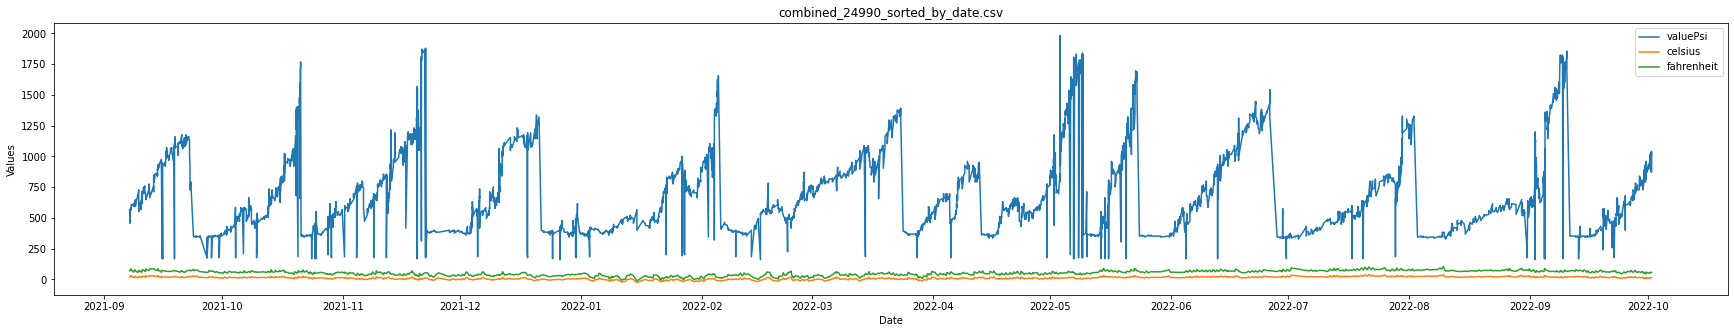

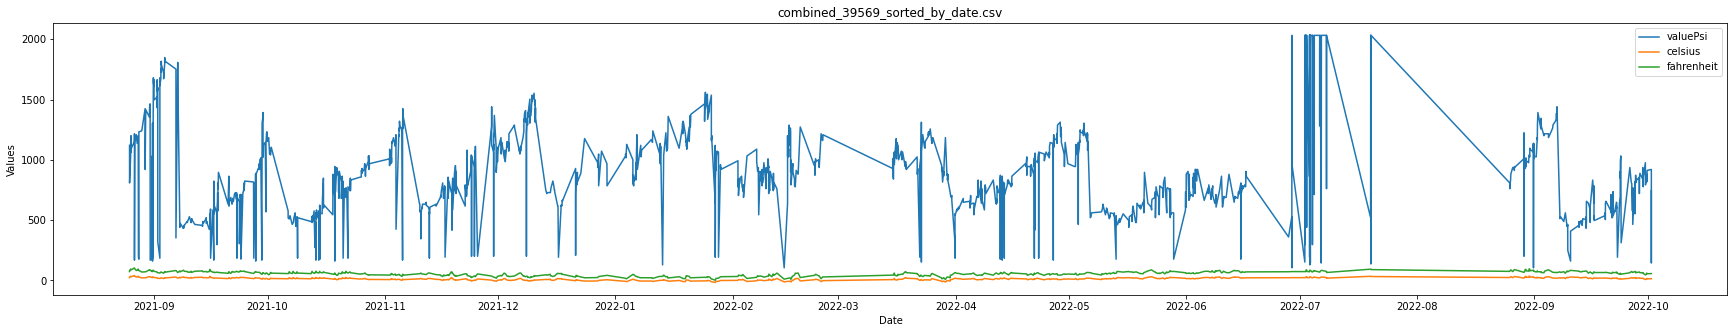

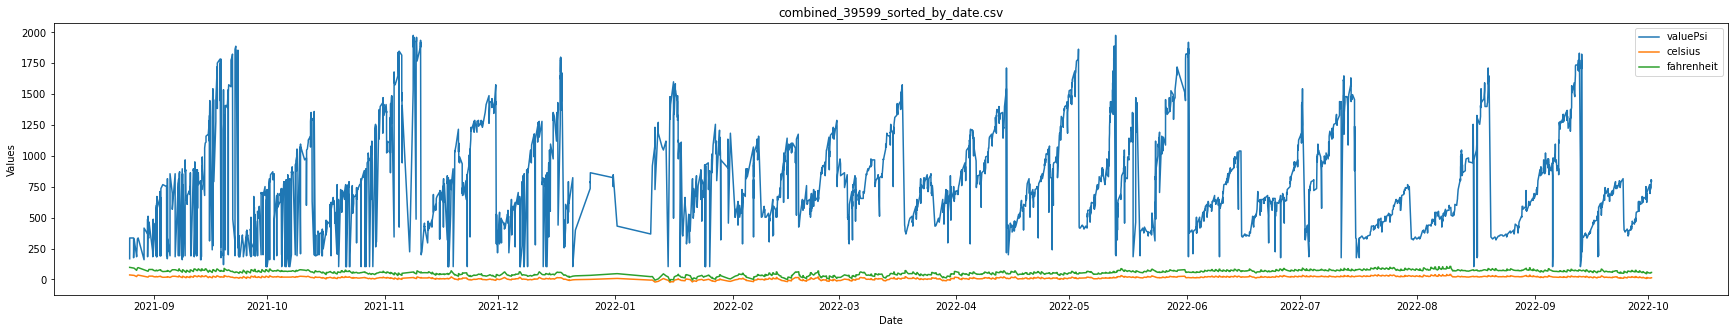

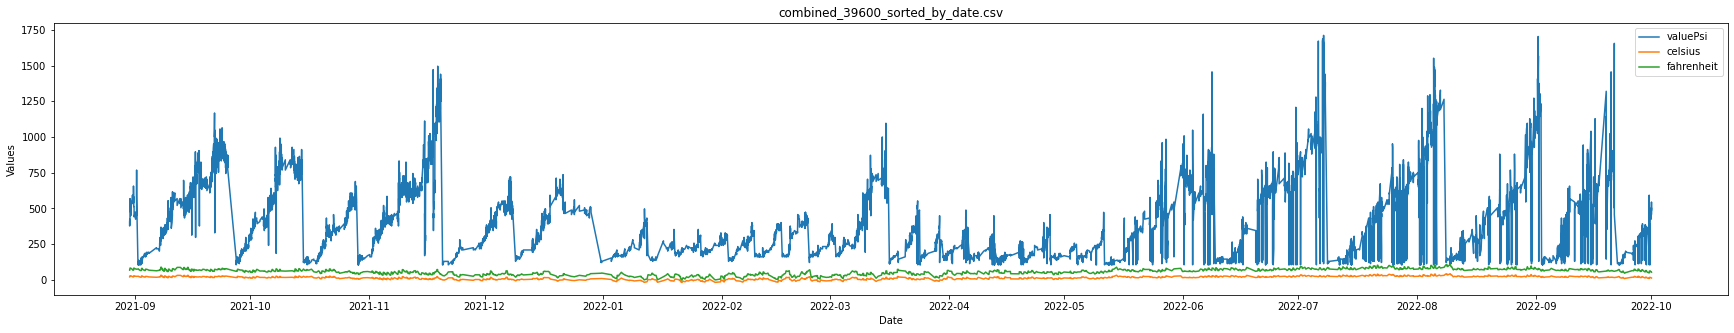

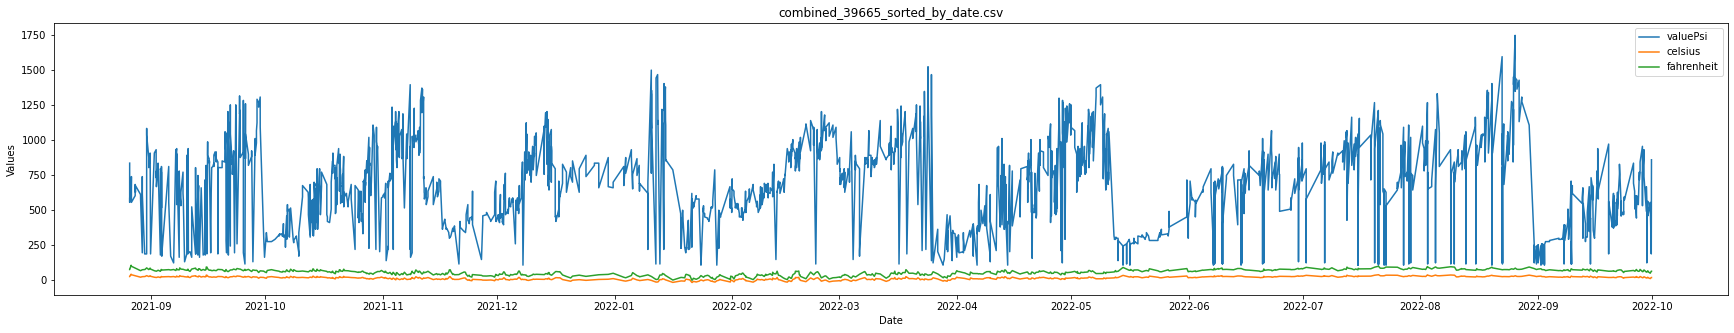

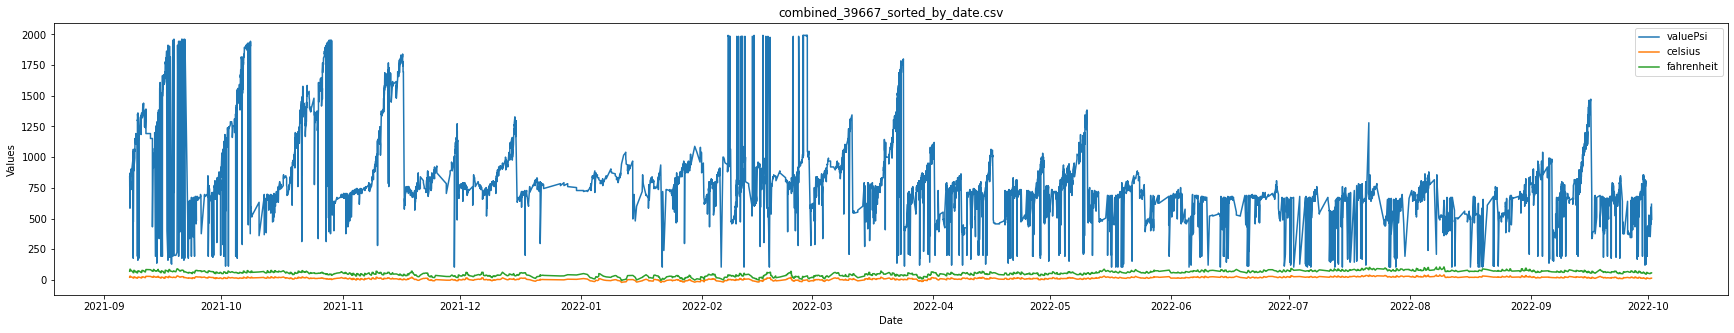

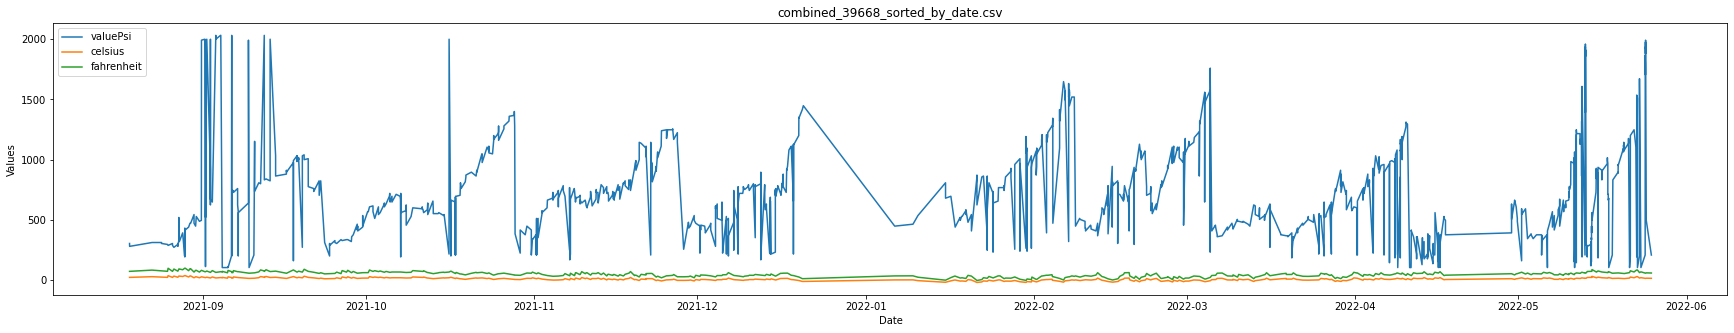

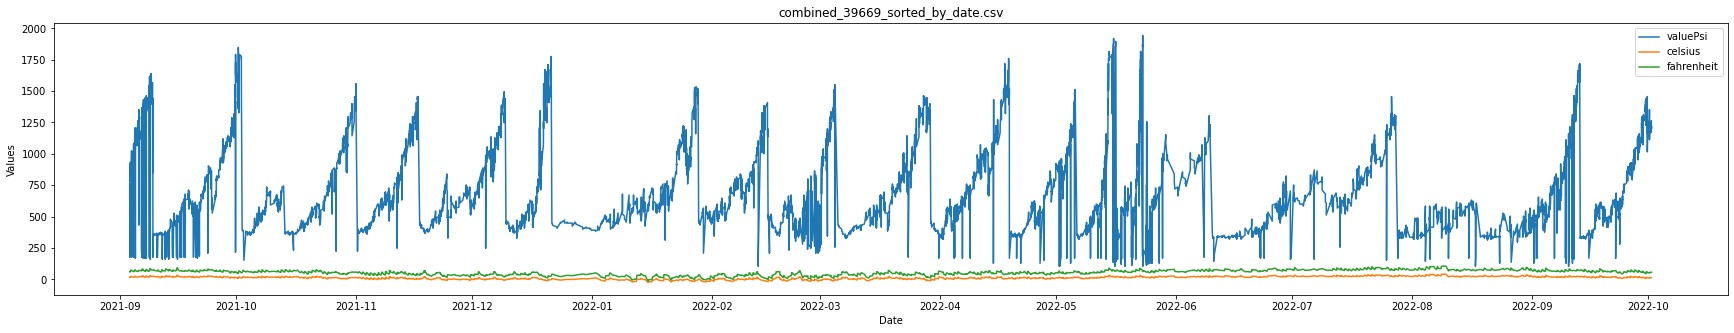

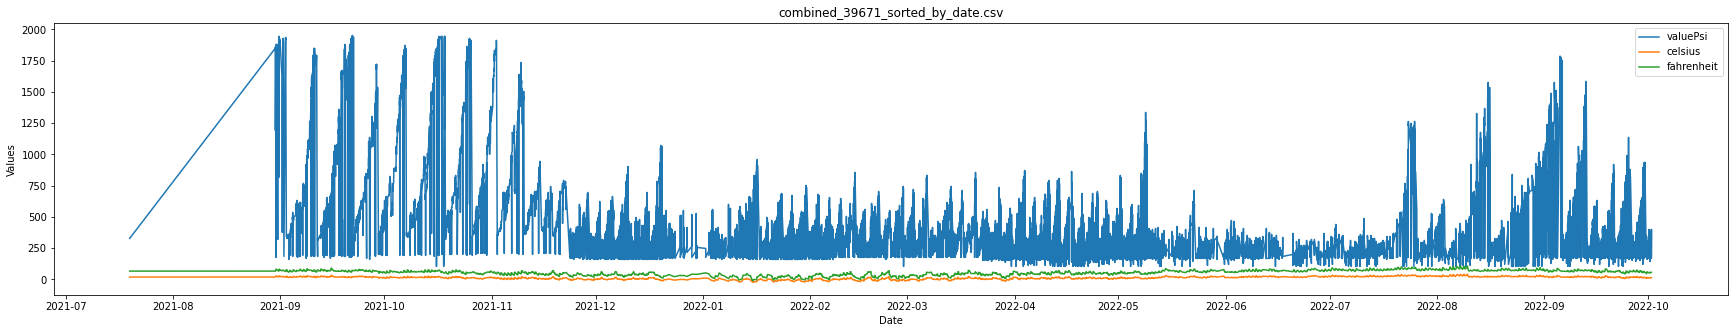

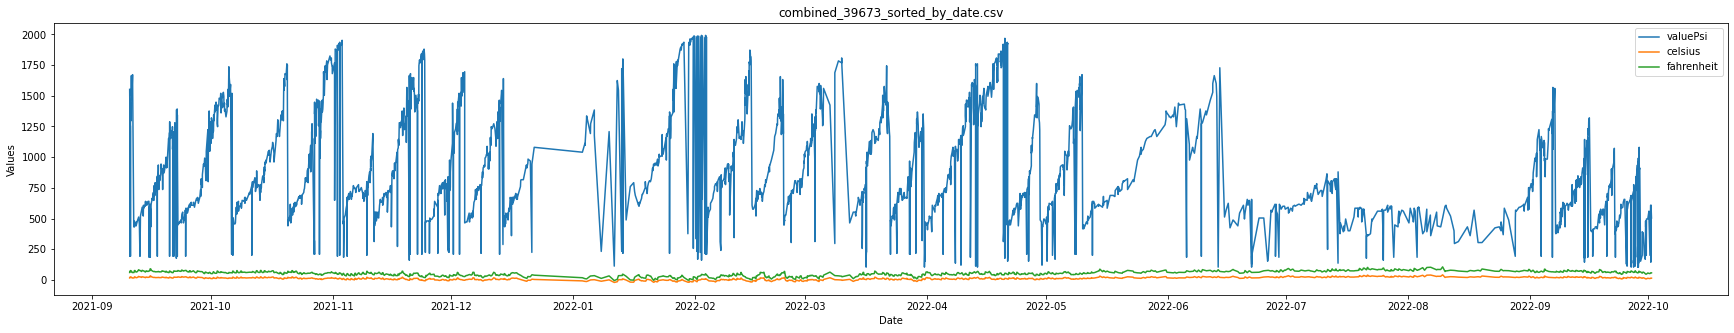

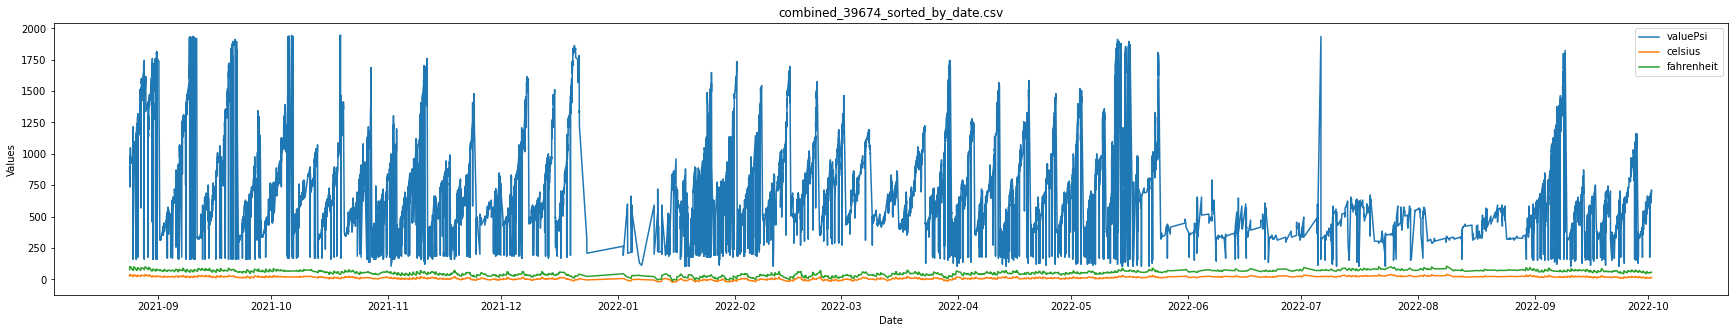

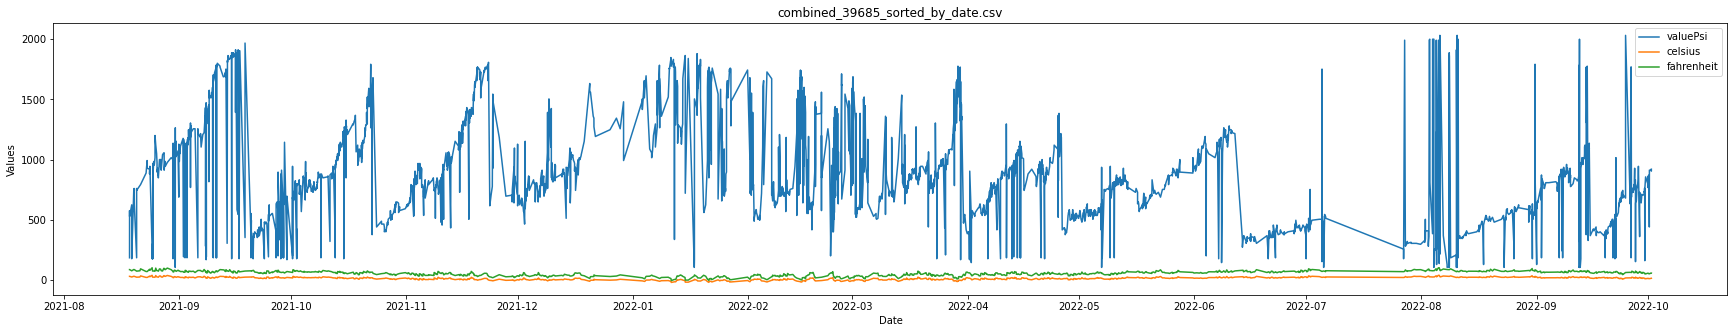

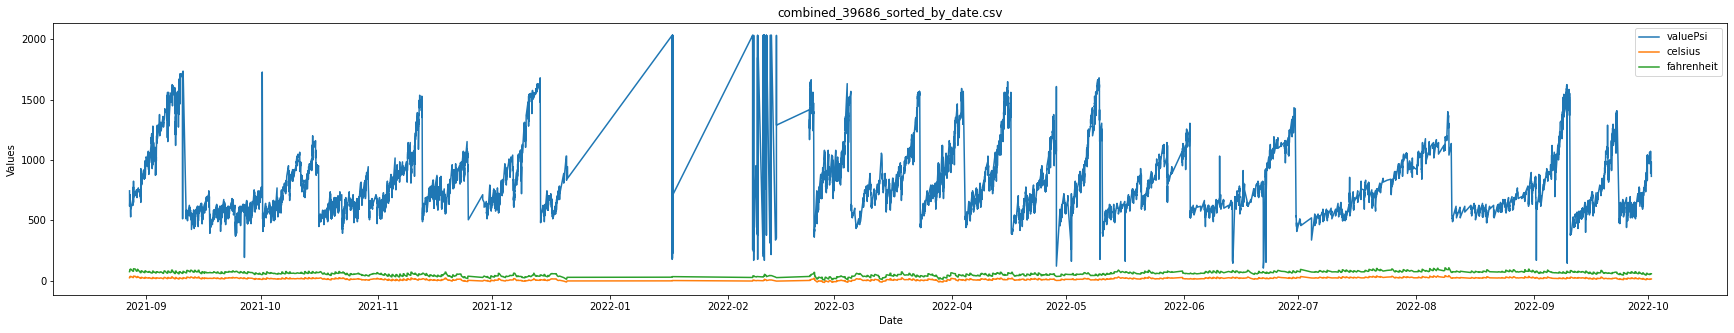

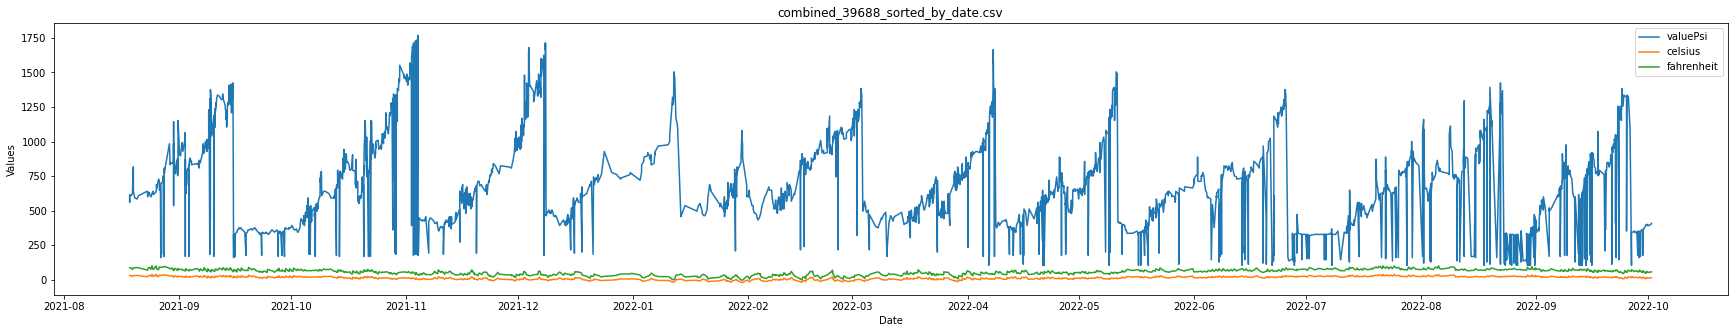

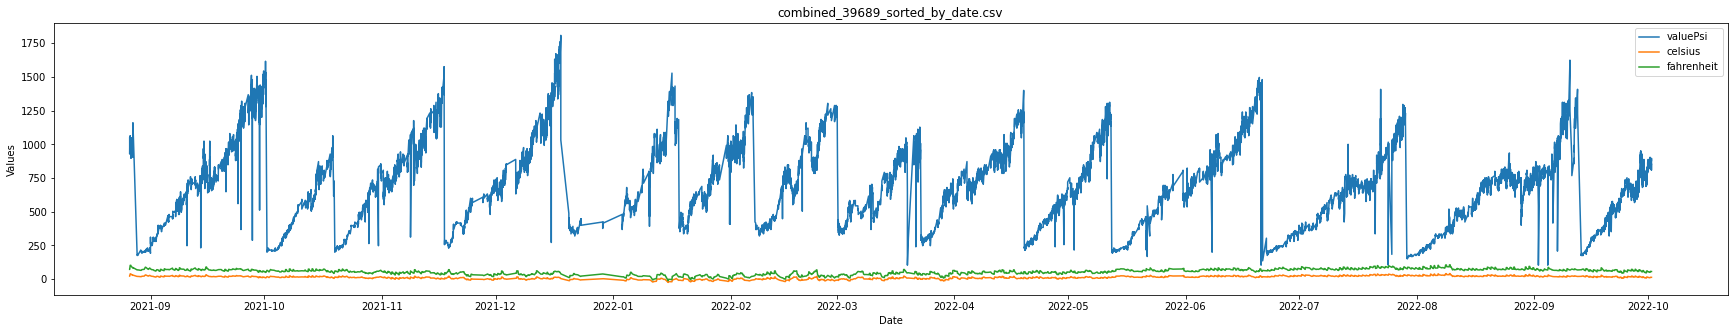

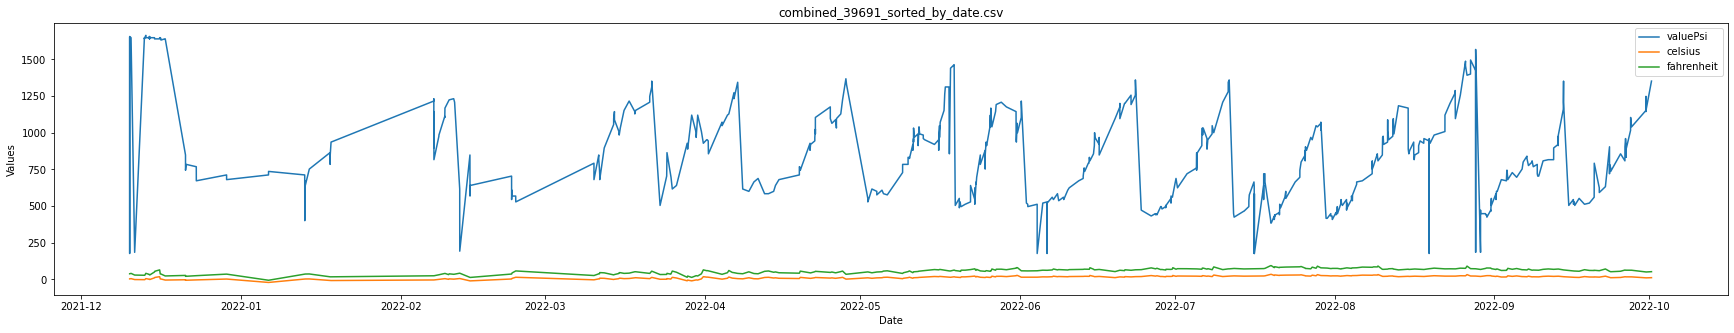

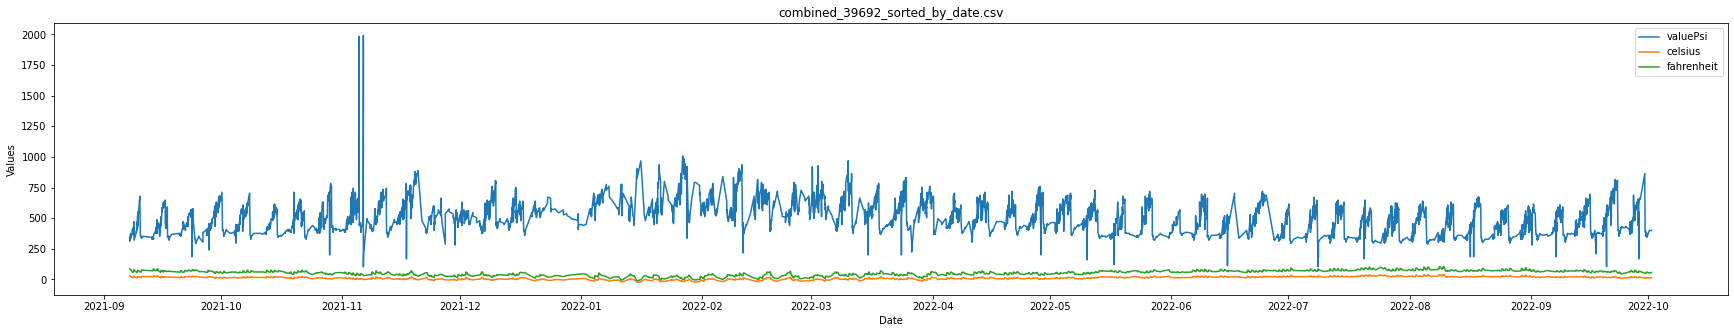

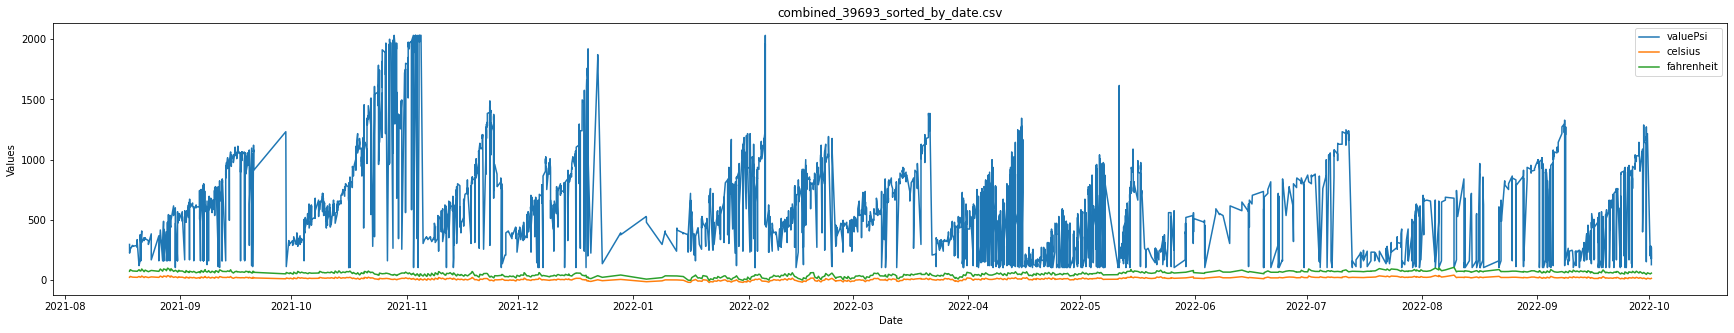

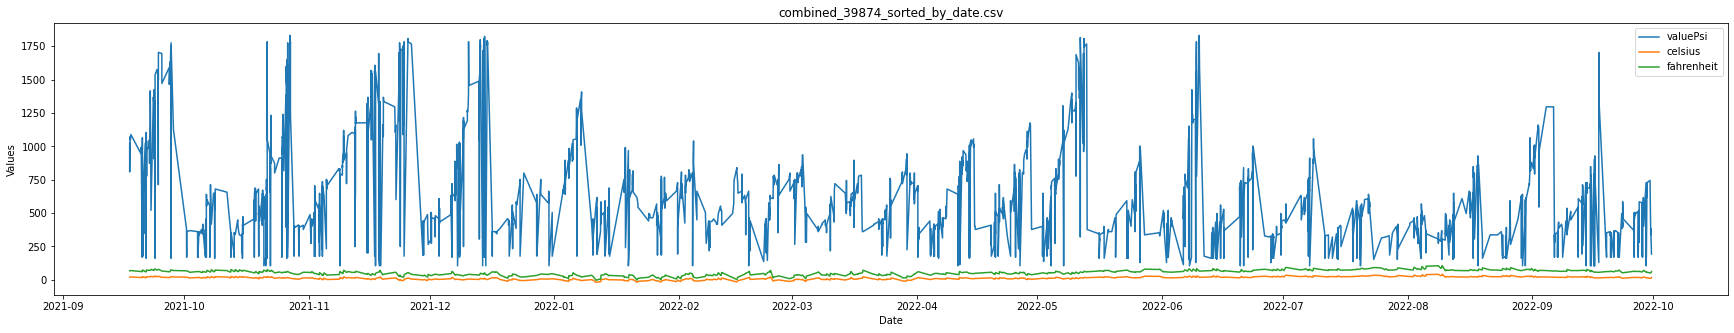

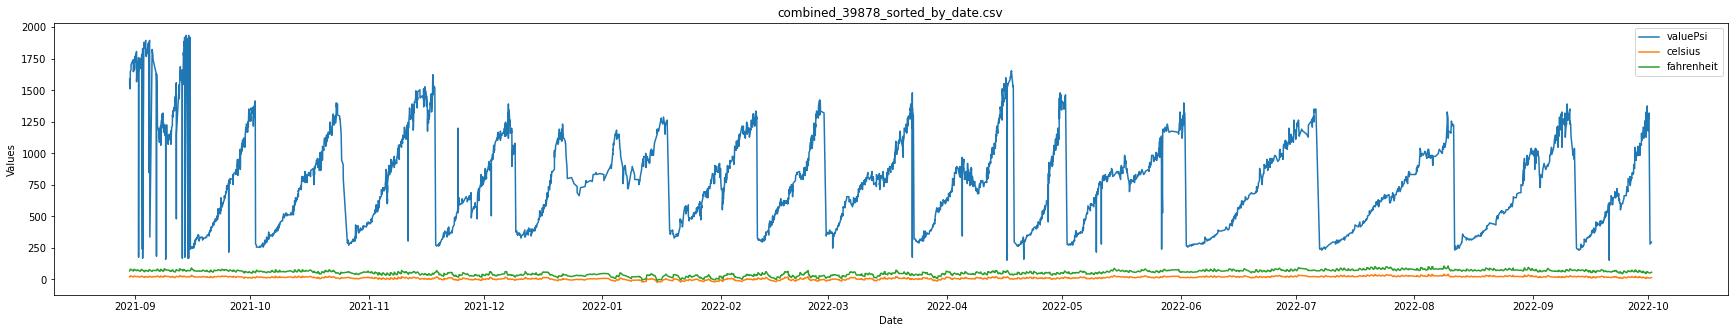

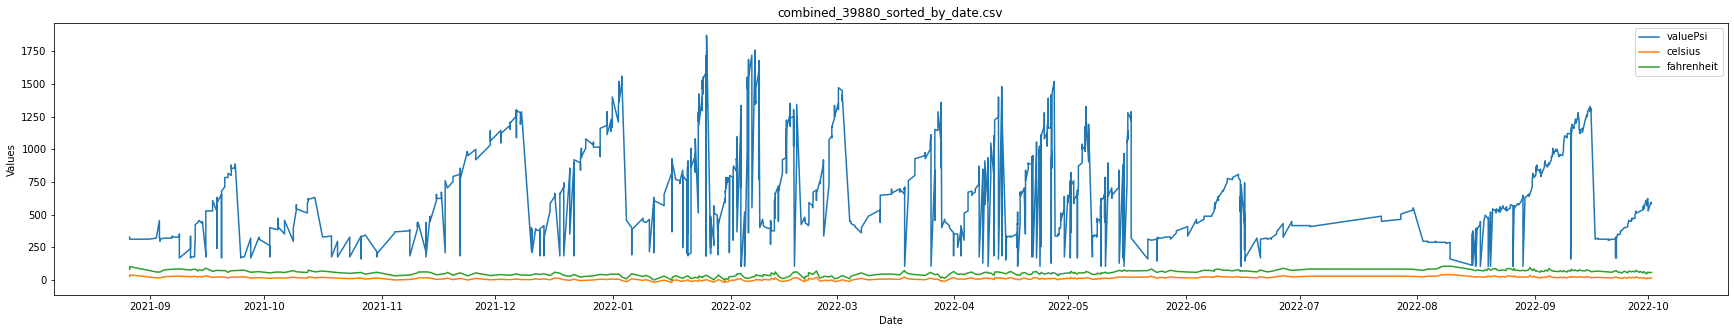

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates

# Set the directory path where the CSV files are stored
directory = '/Users/zeqi/Desktop/cs506.nosync/Project/Data/Processed/combined_reading_device'

# List all the CSV files in the directory and sort them by file name
csv_files = sorted([file for file in os.listdir(directory) if file.endswith('.csv')])

# Create a PDF file to save the plots
pdf_pages = PdfPages('lineChart_for_each_device.pdf')

# Loop over each CSV file and plot it
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, parse_dates=['readingDtUtz'], index_col='readingDtUtz')
    df = df.dropna()
#     df.plot(figsize=(30, 5))
    fig, ax = plt.subplots(figsize=(30, 5))
    ax.plot(df.index, df['valuePsi'], label='valuePsi')
    ax.plot(df.index, df['celsius'], label='celsius')
    ax.plot(df.index, df['fahrenheit'], label='fahrenheit')
    ax.set_title(file)
    ax.set_xlabel('Date')
    ax.set_ylabel('Values')
#     ax.text(df.index[-1], df.max().max(), file, ha='right', va='top')
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.legend()
    pdf_pages.savefig()
    plt.show()
    plt.close()

# Close the PDF file
pdf_pages.close()
